# TPG366 Pressure Over Time Test

Simple notebook for monitoring pressure over time from a Pfeiffer TPG366 gauge (S/N: 44680058).

## 1. Imports

In [11]:
import sys
import os
import time
import logging
from datetime import datetime
from pathlib import Path

import plotly.graph_objects as go

sys.path.append(os.path.join(os.getcwd(), '..', '..', 'src'))

from devices.pfeiffer.tpg366.tpg366 import TPG366

print("Imports done.")

Imports done.


## 2. Setup Logger

In [12]:
repo_root = Path(os.getcwd()).parent.parent
log_dir = repo_root / "debugging" / "logs"
log_dir.mkdir(parents=True, exist_ok=True)

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
log_file = log_dir / f"013_tpg366_pressure_test_{timestamp}.log"

logger = logging.getLogger(f"TPG366_PressureTest_{timestamp}")
logger.setLevel(logging.DEBUG)

file_handler = logging.FileHandler(log_file)
file_handler.setFormatter(logging.Formatter("%(asctime)s - %(levelname)s - %(message)s"))
logger.addHandler(file_handler)

console_handler = logging.StreamHandler()
console_handler.setFormatter(logging.Formatter("%(asctime)s - %(levelname)s - %(message)s"))
logger.addHandler(console_handler)

logger.info("Logger initialized.")
print(f"Log file: {log_file}")

2026-02-11 14:36:24,532 - INFO - Logger initialized.


Log file: C:\Users\ESIBDlab\PycharmProjects\esibd_bs\debugging\logs\013_tpg366_pressure_test_20260211_143624.log


## 3. Initialize and Connect TPG366

In [13]:
gauge = TPG366(
    device_id="tpg366",
    port="COM22",
    device_address=10,
    logger=logger,
)

In [14]:
gauge.connect()
print("TPG366 connected.")

2026-02-11 14:36:27,188 - INFO - Connecting to Pfeiffer device tpg366 on COM22
2026-02-11 14:36:27,213 - INFO - Successfully connected to device at address 10


TPG366 connected.


## 4. Verify Connection

In [15]:
print(f"Serial Number:    {gauge.get_serial_number()}")

Serial Number:    44866963


In [16]:
print(f"Device Name:      {gauge.get_device_name()}")

Device Name:      TPG366


In [17]:
print(f"Firmware Version: {gauge.get_firmware_version()}")

Firmware Version: 010400


In [18]:
gauge.get_sensor_error(1)

'000000'

## 5. Setup Live Plot

In [19]:
fig = go.FigureWidget()
fig.add_scatter(x=[], y=[], mode="lines", name="CH1 Pressure")
fig.update_layout(
    title="TPG366 CH1 Pressure Over Time",
    xaxis_title="Time",
    yaxis_title="Pressure (hPa)",
    width=800,
    height=400,
)
fig

FigureWidget({
    'data': [{'mode': 'lines',
              'name': 'CH1 Pressure',
              'type': 'scatter',
              'uid': '79492a29-1c01-4931-af0a-e01640c633cf',
              'x': [],
              'y': []}],
    'layout': {'height': 400,
               'template': '...',
               'title': {'text': 'TPG366 CH1 Pressure Over Time'},
               'width': 800,
               'xaxis': {'title': {'text': 'Time'}},
               'yaxis': {'title': {'text': 'Pressure (hPa)'}}}
})

## 6. Live Pressure Monitoring (Interrupt with Stop Button)

In [21]:
from datetime import timedelta

console_handler.setLevel(logging.WARNING)
times = []
pressures = []

try:
    while True:
        pressure = gauge.read_pressure_value(1)
        now = datetime.now()
        logger.info(f"CH1 Pressure: {pressure} hPa")
        times.append(now)
        pressures.append(pressure)
        with fig.batch_update():
            fig.data[0].x = times
            fig.data[0].y = pressures
            fig.update_layout(xaxis_range=[now - timedelta(minutes=1), now])
        time.sleep(1)
except KeyboardInterrupt:
    print("Monitoring stopped.")
finally:
    console_handler.setLevel(logging.DEBUG)

Monitoring stopped.


## 7. Disconnect

In [27]:
gauge.disconnect()

2026-02-11 14:45:17,638 - INFO - Disconnected from Pfeiffer device tpg366


True

## 8. Save Results

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
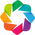

Data saved: C:\Users\ESIBDlab\PycharmProjects\esibd_bs\debugging\logs\20260211_143624\013_tpg366_pressure_data.npz
Matplotlib plot saved: C:\Users\ESIBDlab\PycharmProjects\esibd_bs\debugging\logs\20260211_143624\013_tpg366_pressure_plot.png


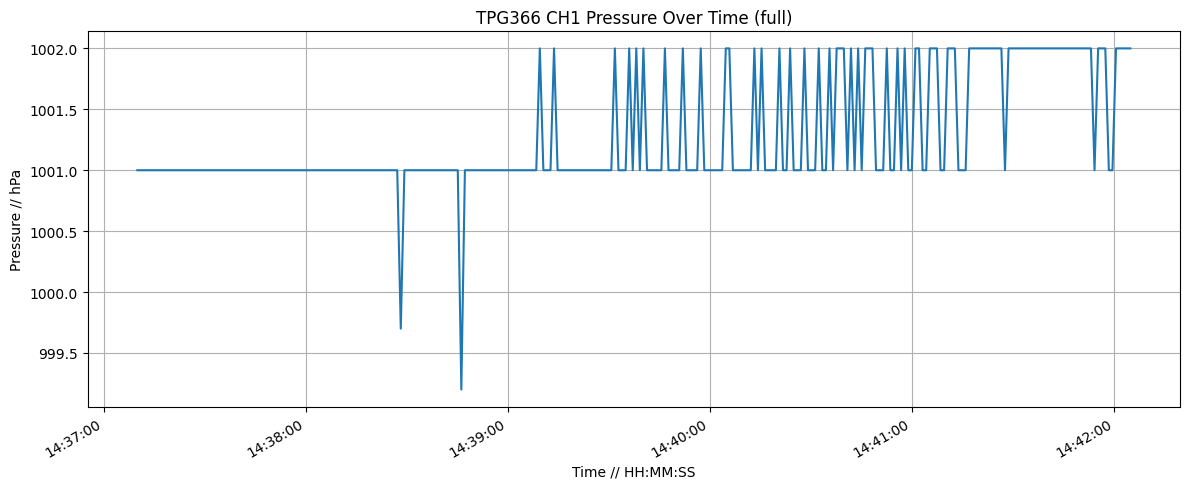

ValueError: Options must be defined in one of two formats. Either supply keywords defining the options for the current object, e.g. obj.options(cmap='viridis'), or explicitly define the type, e.g. obj.options({'Image': {'cmap': 'viridis'}}). Supplying both formats is not supported.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import holoviews as hv
from holoviews import opts
hv.extension("bokeh")

save_dir = log_dir / timestamp
save_dir.mkdir(parents=True, exist_ok=True)

times_arr = np.array(times, dtype="datetime64[ms]")
pressures_arr = np.array(pressures, dtype=np.float64)

# --- Save data as .npz ---
npz_path = save_dir / "013_tpg366_pressure_data.npz"
np.savez(npz_path, times=times_arr, pressures=pressures_arr)
print(f"Data saved: {npz_path}")

# --- Matplotlib plot ---
fig_mpl, ax = plt.subplots(figsize=(12, 5))
ax.plot(times, pressures, linewidth=1.5)
ax.set_xlabel("Time // HH:MM:SS")
ax.set_ylabel("Pressure // hPa")
ax.set_title("TPG366 CH1 Pressure Over Time (full)")
ax.grid(True)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
fig_mpl.autofmt_xdate()
fig_mpl.tight_layout()

mpl_path = save_dir / "013_tpg366_pressure_plot.png"
fig_mpl.savefig(mpl_path, dpi=150)
print(f"Matplotlib plot saved: {mpl_path}")
plt.show()

# --- HoloViews interactive HTML ---
curve = hv.Curve(
    list(zip(times, pressures)),
    kdims=["Time"],
    vdims=["Pressure (hPa)"],
).opts(
    opts.Curve(width=900, height=400, title="TPG366 CH1 Pressure Over Time", tools=["hover"]),
    show_grid=True
)

html_path = save_dir / "013_tpg366_pressure_plot.html"
hv.save(curve, str(html_path))
print(f"HoloViews HTML saved: {html_path}")